<figure> 
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Regresión múltiple en Scikit Learn<center></span>

## <span style="color:blue">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Campo Elías Pardo, PhD, cepardot@unal.edu.co
1. Daniel  Montenegro, Msc, dammontenegrore@unal.edu.co
1. Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora de medios y marketing digital</span>

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

Vamos a trabajar un dataset desde su inicio con la intención de generar un modelo de regresión lineal múltiple.

en este caso trataremos de predecir el precio de una casa en california con base en sus distintas características.

In [1]:
import pandas as pd
from sklearn.datasets import load_boston, fetch_california_housing
#boston= load_boston()
#boston_df = pd.DataFrame(data=boston.data,columns=boston.feature_names)
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Revisamos el tipo de los datos y si tenemos casos nulos

In [2]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


No hay datos nulos, así que podemos trabajar con tranquilidad. Al menos en ese caso.


Podemos continuar obteniendo las estadísticas descriptivas básicas

In [3]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Notamos que las variables tienen rangos muy distintos. Vamos guardar esta información para más adelante.

Por ahora Necesitamos revisar si las variables explicativas/independientes son, en efecto, independientes entre sí.

La forma más rápida de hacer esto es haciendo la matríz de correlación

<AxesSubplot:>

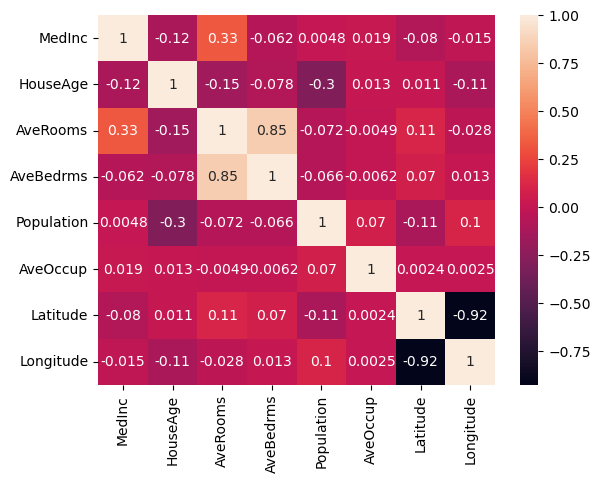

In [4]:
import seaborn as sns

corr_matrix  = housing_df.corr()

sns.heatmap(corr_matrix, annot=True)

Vemos que las variables "AveRooms" y "AveBedrms" tienen una alta correlación, así que podemos eliminar una de estas dos (¿Cuál sería la mejor?)

También "Latitude" y "Longitude" tienen alta correlación, pero en este caso no es posible separarlas ya que no tienen sentido de manera separada. En este caso es mejor o quitarlas las dos o dejarlas. Vamos a quitarlas en este caso

<AxesSubplot:>

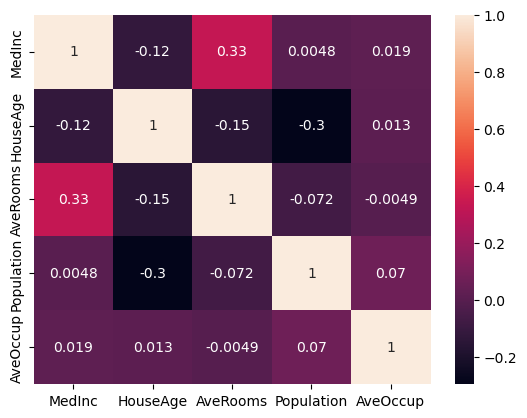

In [5]:
housing_df_drop = housing_df.drop(["AveBedrms", "Latitude", "Longitude"], axis=1)

corr_matrix_drop  = housing_df_drop.corr()

sns.heatmap(corr_matrix_drop, annot=True)

Hay una segunda manera de arreglar multicolinealidad, podemos hacer un análisis de componentes principales. Los componentes resultantes van a tener 0 correlación entre si, y a la vez mantendremos la información de los datos originales

<AxesSubplot:>

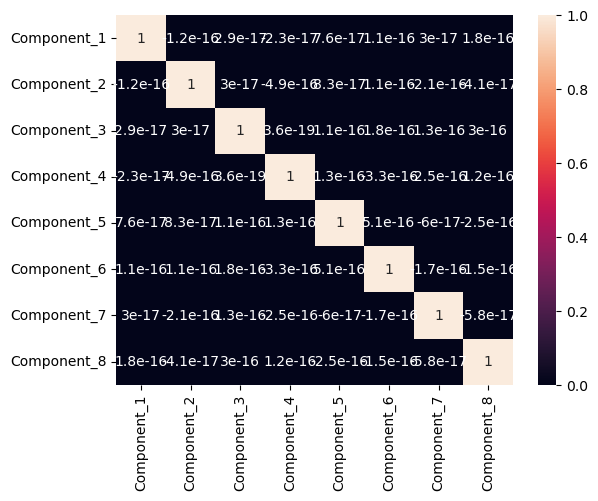

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

components=pca.fit_transform(housing_df)

components_df=pd.DataFrame(data=components,columns=['Component_1','Component_2','Component_3',
                                                    'Component_4','Component_5', 'Component_6',
                                                    'Component_7', 'Component_8'])

#components_df["Contrato_Ate"] = contrato_ATE


corr_matrix_pca = components_df.corr()

sns.heatmap(corr_matrix_pca, annot=True)

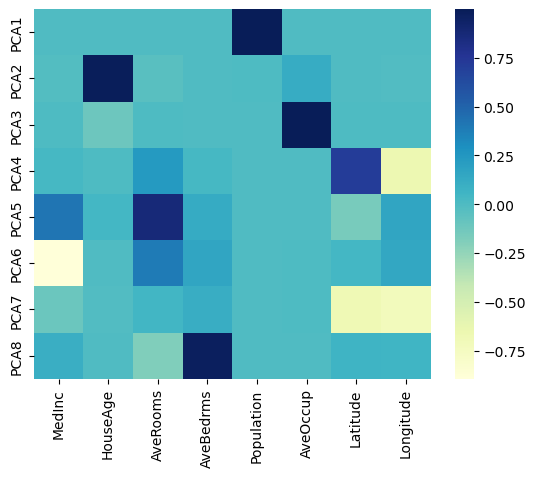

In [7]:
ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(housing_df.columns))

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(housing_df_drop, housing.target, test_size=0.2, random_state=13)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.231821,0.543981,0.030511,0.039993,0.001936
std,0.130466,0.246823,0.018150,0.032287,0.009323
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142055,0.333333,0.023492,0.022003,0.001399
50%,0.208749,0.549020,0.029102,0.032654,0.001712
75%,0.292444,0.705882,0.034936,0.048294,0.002081
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train)

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(mae)
print(r2)

0.6503669457281422
0.6033558748542387
0.5174215468910974
